# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

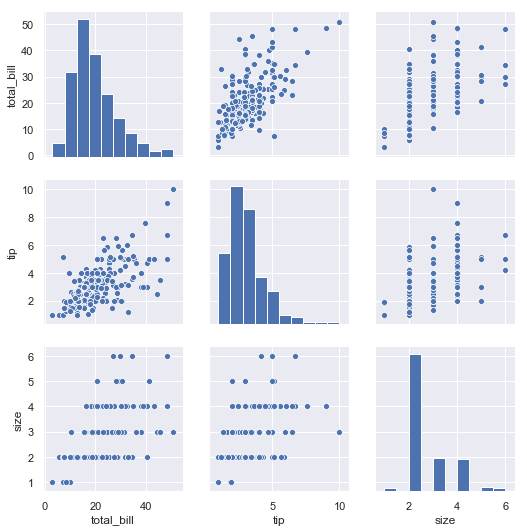

In [6]:
sns.pairplot(tips)
plt.show()

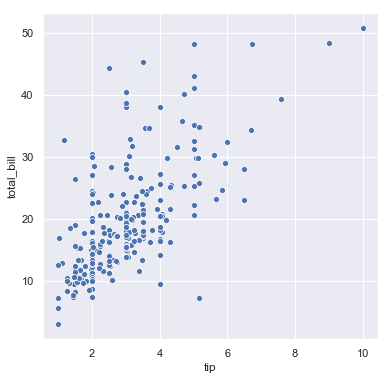

In [3]:
plt.figure(figsize=(6,6))
sns.scatterplot("tip", "total_bill", data=tips)
plt.show()

C:\Users\sarah.desimone\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


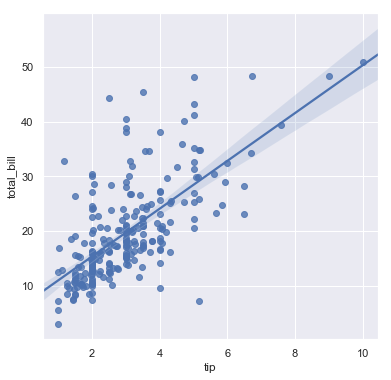

In [4]:
plt.figure(figsize=(6,6))
sns.regplot("tip", "total_bill", data=tips)
plt.show()

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

In [9]:
x=sm.add_constant(tips[['total_bill', 'size']])
y= tips.tip

lm=sm.OLS(y,x).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           9.67e-34
Time:                        15:31:17   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

tip(total_bill, size) = 0.6689 + 54.9285 + .4472size

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

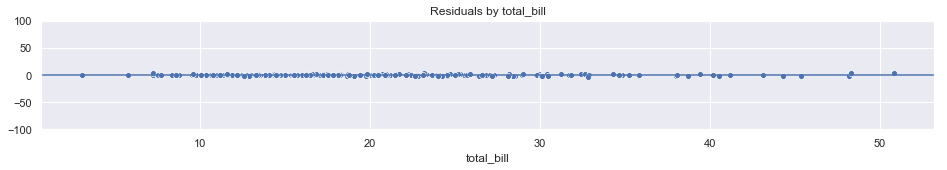

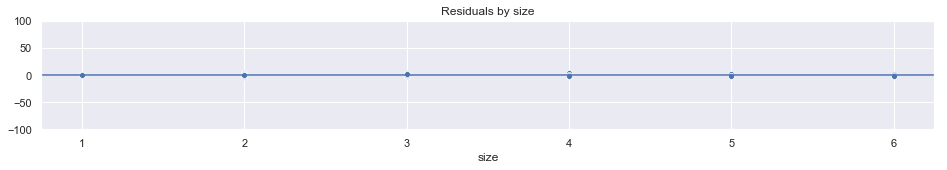

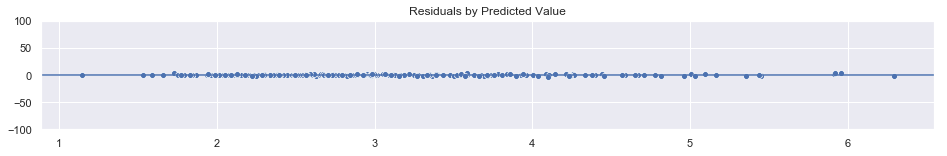

-1.9456203497119547e-15


In [12]:
for x in ('total_bill', 'size'):
    plt.figure(figsize=(16,2))
    sns.scatterplot(tips[x], lm.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
    plt.axhline(np.mean(lm.resid))
    plt.show()

plt.figure(figsize=(16,2))
sns.scatterplot(lm.predict(), lm.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm.resid))
plt.show()

print(np.mean(lm.resid))

4) Does your model meet the four assumptions expected of a linear model? Explain:

It meets the first three assumptions: mean close to zero, constant variance, approximate normal distribution.
However, the four, where the points should appear independnet of one another may not be met as all the points are clustered very close to zero.